#### Business Understanding Of A Telecom Industry Customer Churn:


-  In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



-  Therefore, finding those factors that increase customer churn is important to take necessary actions to reduce this churn. The main goal of our project is to develop an understanding of the cause of customer churn which assists telecom operators to predict customers who are most likely subject to churn, and what to do to retain the most valuable customer.



-  The main objective of the project is to :

Finding factors and cause those influence customers to churn.
Retain churn customers by taking appropriate steps
Providing offers based on affecting factors.
Lo

-  Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('telecom_churn.csv')
data
pd.set_option('display.max_columns',None)
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
list(data.columns)

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
data.shape

(3333, 20)


-  STATE: 51 Unique States name

Account Length: Length of The Account

Area Code: Code Number of Area having some States

International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages: Number of Voice Mail Messages ranging from 0 to 50

Total day minutes: Total Number of Minutes Spent in Morning

Total day calls: Total Number of Calls made in Morning.

Total day charge: Total Charge to the Customers in Morning.

Total eve minutes: Total Number of Minutes Spent in Evening

Total eve calls: Total Number of Calls made r in Evening.

Total eve charge: Total Charge to the Customers in Morning.

Total night minutes: Total Number of Minutes Spent in the Night.

Total night calls: Total Number of Calls made in Night.

Total night charge: Total Charge to the Customers in Night.

Customer service calls Number of customer service calls made by customer

Churn Customer Churn, True means churned customer, False means retained customer



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


-  Account length and area code does not matter for describing the dataset because they are jus codes. Where as the parameters related to Day, Eve, Night and international gives us the usage insight of the data


In [9]:
data.describe(include='O')

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [10]:
data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [11]:
data.rename(columns={'Account length':'account_length',
                     'Area code':'area_code',
                     'International plan':'intl_plan',
                      'Voice mail plan':'vmail_plan',
                       'Number vmail messages':'vmail_message',
                       'Total day minutes':'day_mins',
                       'Total day calls':'day_calls',
                       'Total day charge':'day_charge',
                       'Total eve minutes':'eve_mins',
                      'Total eve calls': 'eve_calls',
                      'Total eve charge':'eve_charge',
                      'Total night minutes':'night_mins',
                      'Total night calls':'night_calls',
                     'Total night charge':'night_charge',
                     'Total intl minutes':'intl_mins',
                      'Total intl calls':'intl_calls',
                     'Total intl charge':'intl_charge',
                     'Customer service calls':'custServ_calls',
                     'Churn':'churn'},inplace=True)


In [12]:
list(data.columns)

['State',
 'account_length',
 'area_code',
 'intl_plan',
 'vmail_plan',
 'vmail_message',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'intl_mins',
 'intl_calls',
 'intl_charge',
 'custServ_calls',
 'churn']

In [13]:
data.isnull().sum()

State             0
account_length    0
area_code         0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custServ_calls    0
churn             0
dtype: int64

In [14]:
data.duplicated().sum()

0

## univariant analysis

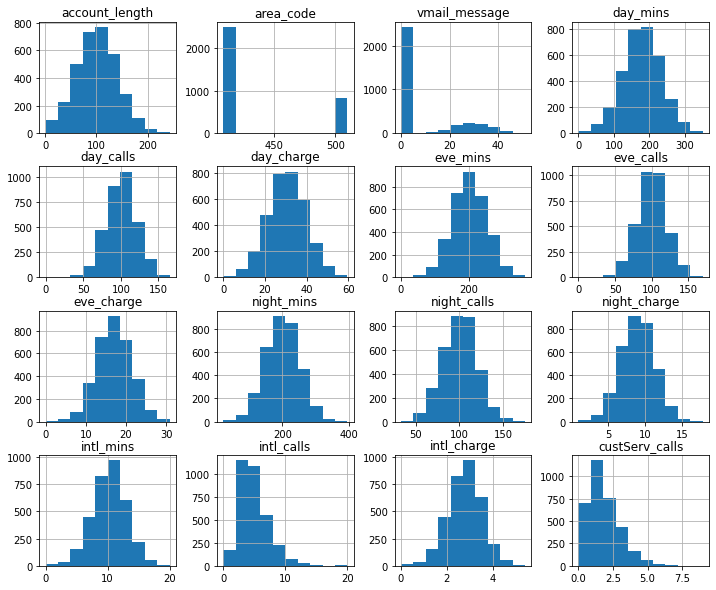

In [15]:
data.hist(figsize=(12,10))
plt.show()

In [16]:
data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

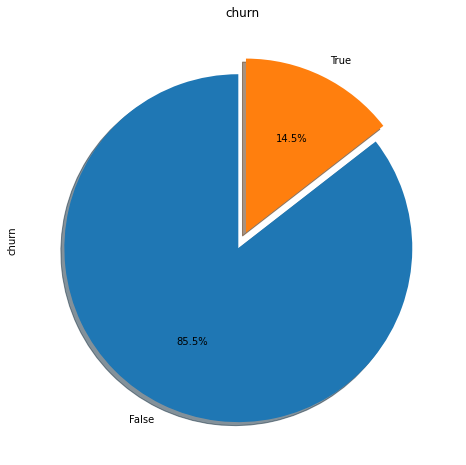

In [17]:
data['churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', startangle=90,shadow=True,figsize=(8,8))
plt.title('churn')
plt.show()

<AxesSubplot: xlabel='churn', ylabel='count'>

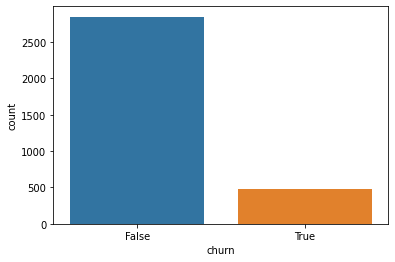

In [18]:
sns.countplot(data['churn'])

-  from the aove piechart it is evident that 15% of the customers are churned.

### bivariant analysis

In [19]:
data['State'].nunique()

51

In [20]:
data.State.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

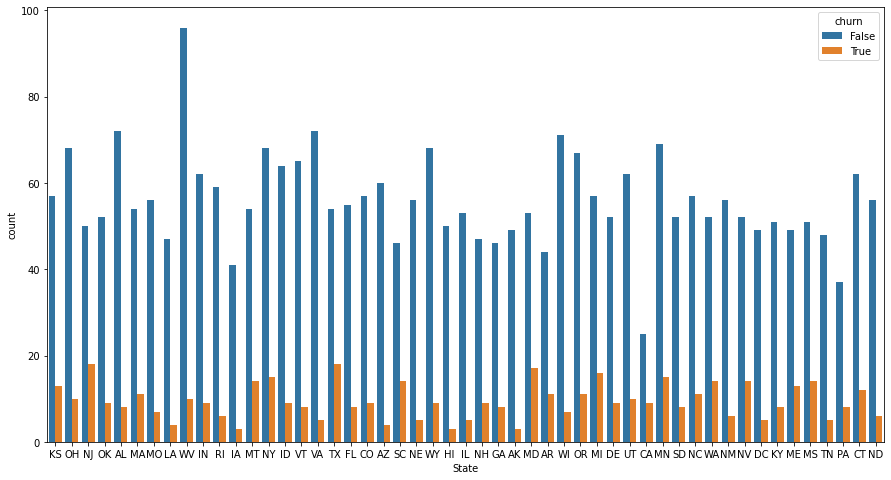

In [21]:
###Comparison churn with state by using countplot
plt.figure(figsize=(15,8))
sns.countplot(x='State', hue='churn',data=data)
plt.show()

In [22]:
#show the most churn state of top 10 by ascending the above list
data.groupby(['State'])['churn'].mean().sort_values(ascending = False).head(30)


State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
Name: churn, dtype: float64

In [23]:
data['area_code'].value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

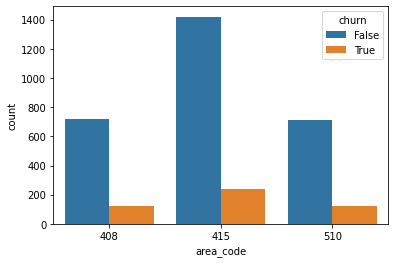

In [24]:
sns.countplot(x='area_code',hue='churn',data=data)
plt.show()

-  In the above data, we notice that there is only 3 unique value are there i.e408,415,510 and the churn rate of these area codes are almost same.

-  we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.



In [25]:
data['account_length'].value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: account_length, Length: 212, dtype: int64

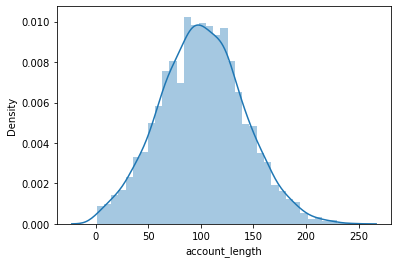

In [27]:
sns.distplot(data['account_length'])
plt.show()

-  After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.



#### international plan

In [28]:
data['intl_plan'].value_counts()

No     3010
Yes     323
Name: intl_plan, dtype: int64

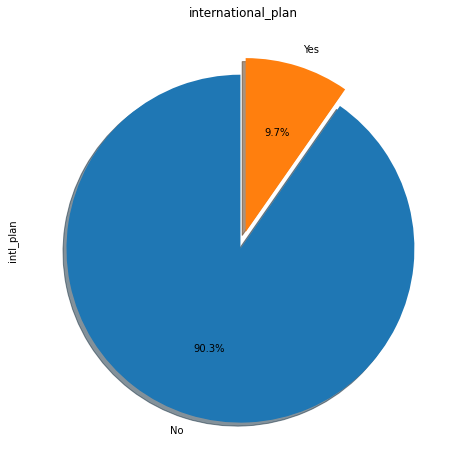

In [29]:
data['intl_plan'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', startangle=90,shadow=True,figsize=(8,8))
plt.title('international_plan')
plt.show()

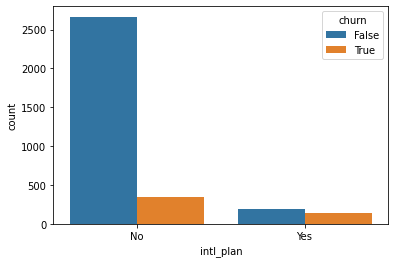

In [30]:
sns.countplot(x='intl_plan',hue='churn',data=data)
plt.show()

-  From the above data we get
-  There are 3010 customers who dont have a international plan.
-  There are 323 customers who have a international plan.
-  Among those who have a international plan 42.4 % people churn.-  Whereas among those who dont have a international plan only 11.4 % people churn.-  So basically the people who bought International plans are churning in big numbers.-  Probably because of connectivity issues or high call charge.



#### voice mail plan

In [31]:
data['vmail_plan'].value_counts()

No     2411
Yes     922
Name: vmail_plan, dtype: int64

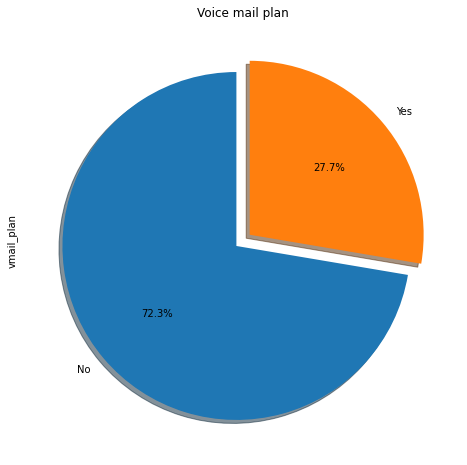

In [33]:
data['vmail_plan'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', startangle=90,shadow=True,figsize=(8,8))
plt.title('Voice mail plan')
plt.show()

<AxesSubplot: xlabel='vmail_plan', ylabel='count'>

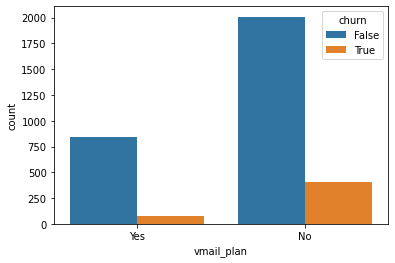

In [34]:
sns.countplot(x='vmail_plan',hue='churn',data=data)

-  As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.



#### number voice mail messages

In [35]:
data['vmail_message'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: vmail_message, dtype: int64

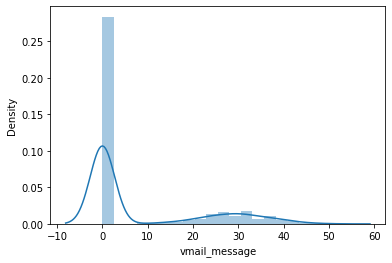

In [37]:
sns.distplot(data['vmail_message'])
plt.show()

-  After analyzing the above voice mail feature data we get an insight that when there are more than 20-40 voice-mail messages then there is a churn

-  For that, we need to improve the voice mail quality.



#### CUSTOMER SERVICE CALLS

In [48]:
data.columns

Index(['State', 'account_length', 'area_code', 'intl_plan', 'vmail_plan',
       'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins',
       'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'intl_mins', 'intl_calls', 'intl_charge', 'custServ_calls', 'churn'],
      dtype='object')

In [49]:
data['custServ_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: custServ_calls, dtype: int64

In [52]:
Customer_service_calls_data = pd.crosstab(data['custServ_calls'],data["churn"])

Customer_service_calls_data


churn,False,True
custServ_calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


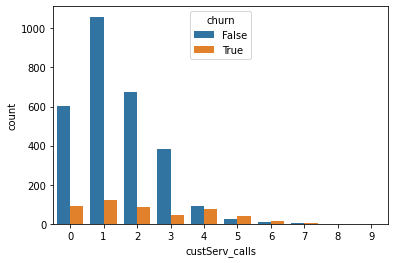

In [53]:
sns.countplot(x='custServ_calls',hue='churn',data=data)
plt.show()

-  It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.
-  The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%
-  And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.
-  So operator should work to improve the service call.



#### analysing minutes, charges and all calls together

-  As these data sets are numerical data type, so for analysing with the 'churn' which is a catagorical data set, We are using mean, median, and box plots.*



#### total day calls, charge and minutes

In [55]:
#mean value of churned and no churned for total day calls
data.groupby(['churn'])['day_calls'].mean()

churn
False    100.283158
True     101.335404
Name: day_calls, dtype: float64

In [56]:
#mean value of churned and no churned for total day minutes
data.groupby(['churn'])['day_mins'].mean()

churn
False    175.175754
True     206.914079
Name: day_mins, dtype: float64

In [57]:
#mean value of churned and no churned for total day charge
data.groupby(['churn'])['day_charge'].mean()

churn
False    29.780421
True     35.175921
Name: day_charge, dtype: float64

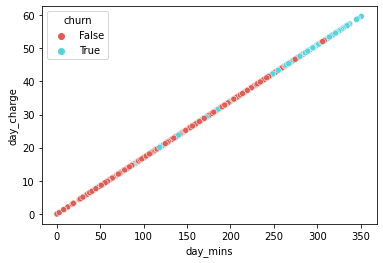

In [58]:
#show the relation using scatter plot
sns.scatterplot(x="day_mins", y="day_charge", hue="churn", data=data,palette='hls')
plt.show()

-  from the above scatter plot it is evident that with user spending more than 250 minutes tend to switch tootheroperator.
-  the customer who have high callminutes also have high call price these tend to churn

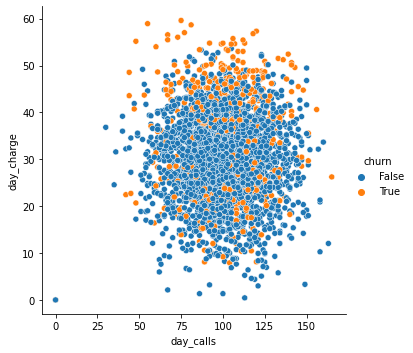

In [79]:
sns.relplot(x='day_calls',y='day_charge',hue='churn',data=data)


-  Graph clearly shows that those who left services are the day caller and they were facing high charge over call so company must provide some discount to retain them.


In [60]:
data['day_mins'].value_counts()

154.0    8
159.5    8
174.5    8
183.4    7
175.4    7
        ..
78.6     1
200.9    1
254.3    1
247.0    1
180.8    1
Name: day_mins, Length: 1667, dtype: int64

In [61]:
data['day_calls'].value_counts()

102    78
105    75
95     69
107    69
104    68
       ..
149     1
163     1
30      1
165     1
36      1
Name: day_calls, Length: 119, dtype: int64

In [62]:
data['day_charge'].value_counts()

26.18    8
27.12    8
29.67    8
31.18    7
29.82    7
        ..
13.36    1
34.15    1
43.23    1
41.99    1
30.74    1
Name: day_charge, Length: 1667, dtype: int64

#### total evening calls,charge,minutes

In [63]:
#mean value of churned and no churned for eve calls
data.groupby(['churn'])['eve_calls'].mean()

churn
False    100.038596
True     100.561077
Name: eve_calls, dtype: float64

In [64]:
#mean value of churned and no churned for eve charge
data.groupby(['churn'])['eve_charge'].mean()

churn
False    16.918909
True     18.054969
Name: eve_charge, dtype: float64

In [65]:
#mean value of churned and no churned for eve minutes
data.groupby(['churn'])['eve_mins'].mean()

churn
False    199.043298
True     212.410145
Name: eve_mins, dtype: float64

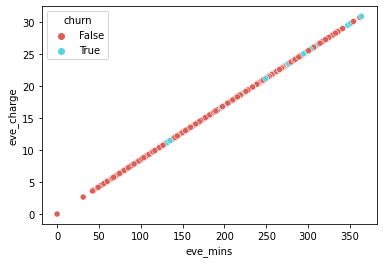

In [66]:
#show the relation using scatter plot
sns.scatterplot(x="eve_mins", y="eve_charge", hue="churn", data=data,palette='hls')
plt.show()

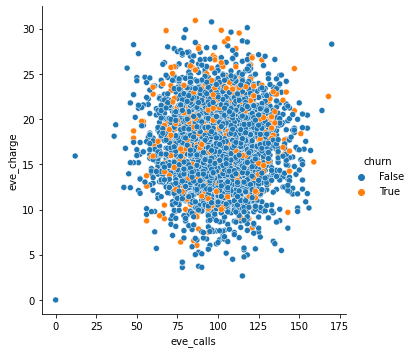

In [80]:
sns.relplot(x='eve_calls',y='eve_charge',hue='churn',data=data)
plt.show()


-  Evening calls and charges are showing us equal results for both churn and not churn customers so it is hard to say anything.


#### total night clls,charge, minutes

In [67]:
#mean value of churned and no churned for night calls
data.groupby(['churn'])['night_calls'].mean()

churn
False    100.058246
True     100.399586
Name: night_calls, dtype: float64

In [68]:
#mean value of churned and no churned for night charge
data.groupby(['churn'])['night_charge'].mean()

churn
False    9.006074
True     9.235528
Name: night_charge, dtype: float64

In [69]:
#mean value of churned and no churned for night minutes
data.groupby(['churn'])['night_mins'].mean()

churn
False    200.133193
True     205.231677
Name: night_mins, dtype: float64

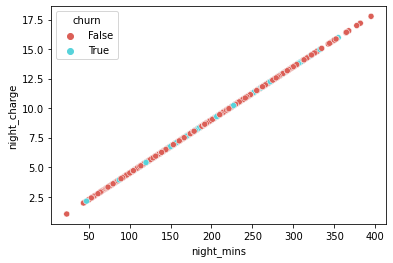

In [70]:
#show the relation using scatter plot
sns.scatterplot(x="night_mins", y="night_charge", hue="churn", data=data,palette='hls')
plt.show()

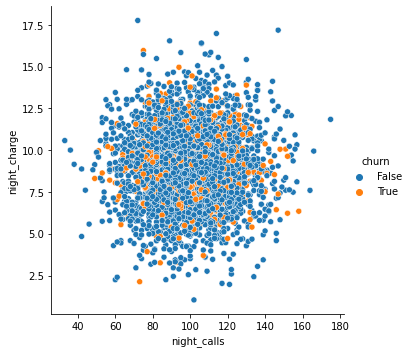

In [81]:
sns.relplot(x='night_calls',y='night_charge',hue='churn',data=data)
plt.show()


-  Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate.
-  In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.

-  We can see that total charge is getting increased with the minutes for both day, evening and night.


## Multivariant analysis

<AxesSubplot: >

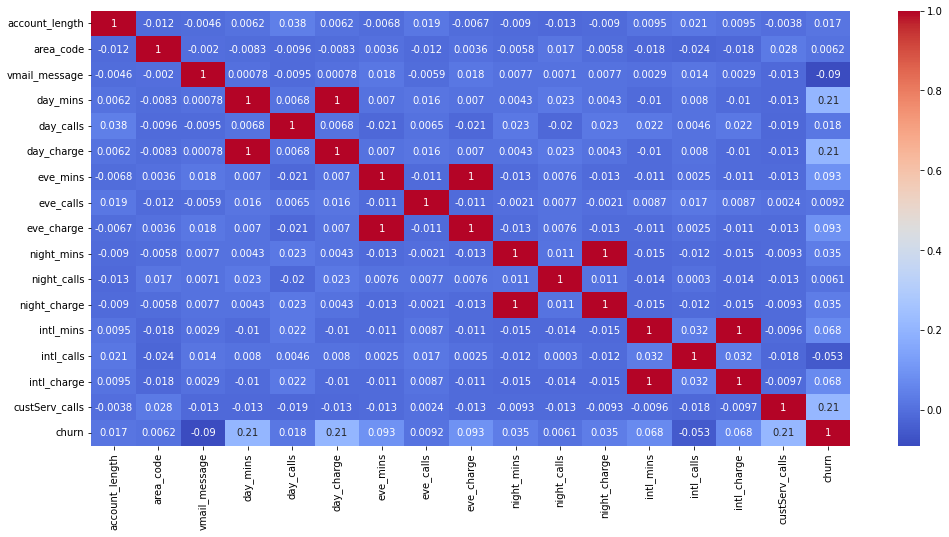

In [77]:
plt.figure(figsize=(17,8))
correlation=data.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')


-   there is negative correlation between voice mailmessages and international calls.
-  We can see that from the heat map there are certain attributes with correlation of 1. These variables can be left out since they do not contribute any additional information.



In [101]:
# Drop deprecated corr. 1 features
data.drop(columns=["day_mins", "eve_mins", "night_mins", "intl_mins"], axis=1, inplace=True)


# data preprocessing

In [102]:
data.duplicated().sum()

0

In [103]:
data.isnull().sum()

State             0
account_length    0
area_code         0
intl_plan         0
vmail_plan        0
vmail_message     0
day_calls         0
day_charge        0
eve_calls         0
eve_charge        0
night_calls       0
night_charge      0
intl_calls        0
intl_charge       0
custServ_calls    0
churn             0
dtype: int64

In [90]:
data

,State,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custServ_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Convert Categorical Values


In [93]:
data['intl_plan'].replace({'No':0,'Yes':1},inplace=True)
data['vmail_plan'].replace({'No':0,'Yes':1},inplace=True)
data['churn'].replace({'False':0,'True':1},inplace=True)

In [98]:
data['churn']=data['churn'].astype('int64')

In [104]:
data

,State,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge,custServ_calls,churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,WV,68,415,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,RI,28,510,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,CT,184,510,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


In [106]:
data.dtypes

State              object
account_length      int64
area_code           int64
intl_plan           int64
vmail_plan          int64
vmail_message       int64
day_calls           int64
day_charge        float64
eve_calls           int64
eve_charge        float64
night_calls         int64
night_charge      float64
intl_calls          int64
intl_charge       float64
custServ_calls      int64
churn               int64
dtype: object

In [110]:
data.drop(['State'],axis=1,inplace=True)

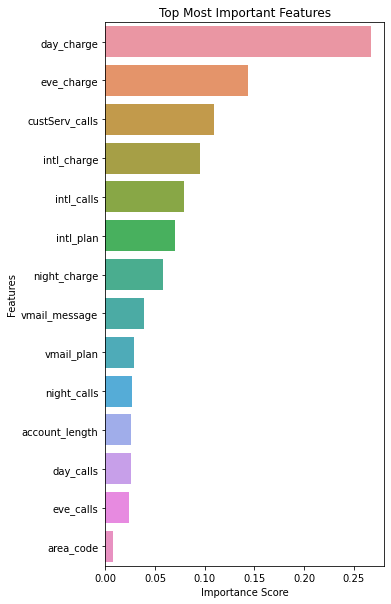

In [111]:
from sklearn.ensemble import RandomForestRegressor
x=data.drop('churn',axis=1)
y=data['churn']
# training random forest model
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x, y)

importances=rf_model.feature_importances_
# Create a dataframe of feature importances
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance score
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(5,10))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Top Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [113]:
data.drop(['area_code'],axis=1,inplace=True)

In [114]:
data

,account_length,intl_plan,vmail_plan,vmail_message,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge,custServ_calls,churn
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,68,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,28,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,184,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


### splitting

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [118]:
(x_train.shape),(y_train.shape),(x_test.shape),(y_test.shape)



((2333, 14), (2333,), (1000, 14), (1000,))

### scaing

In [119]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### smoting

In [126]:
from collections import Counter
print('Actual ', Counter(y_train))

Actual  Counter({0: 1993, 1: 340})


In [129]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train_sm,y_train_sm=sm.fit_resample(x_train_scaled,y_train)

In [130]:
print('Actual ', Counter(y_train))
print('Smote ', Counter(y_train_sm))

Actual  Counter({0: 1993, 1: 340})
Smote  Counter({0: 1993, 1: 1993})


## MODELLING

### LOGISTIC REGRESSION

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,confusion_matrix

In [134]:
#instantiating the object
lr= LogisticRegression()
#training the model
lr.fit(x_train_sm, y_train_sm)
#predicting
# Predict the labels of the training set
lr_train= lr.predict(x_train_sm)
# Predict the labels of the testing set
lr_pred= lr.predict(x_test_scaled)




In [135]:
# classification report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       857
           1       0.36      0.79      0.49       143

    accuracy                           0.77      1000
   macro avg       0.66      0.78      0.67      1000
weighted avg       0.87      0.77      0.80      1000



In [139]:
print(classification_report(y_train_sm,lr_train))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1993
           1       0.76      0.75      0.75      1993

    accuracy                           0.76      3986
   macro avg       0.76      0.76      0.76      3986
weighted avg       0.76      0.76      0.76      3986



In [136]:
# accuracy score
acc_train = accuracy_score(y_train_sm, lr_train)
print("Training accuracy: ", acc_train)

acc_test = accuracy_score(y_test, lr_pred)

print("Testing accuracy: ", acc_test)


Training accuracy:  0.7563973908680381
Testing accuracy:  0.767


In [ ]:
# precision score

In [137]:
precision_train = precision_score(y_train_sm, lr_train)
print("Training precision: ", precision_train)


precision_test = precision_score(y_test, lr_pred)
print("Testing precision: ", precision_test)


Training precision:  0.7617827868852459
Testing precision:  0.3575949367088608


In [138]:
f1_train = f1_score(y_train_sm, lr_train)
print("Training F1 score: ", f1_train)

f1_test = f1_score(y_test, lr_pred)
print("Testing F1 score: ", f1_test)


Training F1 score:  0.7538656527249683
Testing F1 score:  0.4923747276688454


In [140]:
confusion_matrix(y_test,lr_pred)

array([[654, 203],
       [ 30, 113]])

In [183]:
#making the instance
log= LogisticRegression(random_state=42)

#learning
log.fit(x_train_sm,y_train_sm)

#Prediction
prediction1=log.predict(x_train_sm)
prediction2=log.predict(x_test_scaled)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

Log_Accuracy_train = accuracy_score(prediction1,y_train_sm)
Log_Accuracy_test = accuracy_score(prediction2,y_test)
pre_lr=precision_score(y_test, prediction2)
recall_lr=recall_score(y_test, prediction2)

#evaluation(Accuracy)
print("Log_Accuracy_train:",accuracy_score(prediction1,y_train_sm))
print("Log_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2))

#Error Rate
print('Error Rate of Testing:', 1-Log_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train_sm, prediction1))  
print(classification_report(y_test, prediction2)) 

Log_Accuracy_train: 0.7563973908680381
Log_Accuracy_test: 0.767
Confusion Metrix test:
 [[654  30]
 [203 113]]
Precision score of Testing:  0.3575949367088608
Recall/Sensitivity score of Testing:  0.7902097902097902
F1 Score score of Testing:  0.4923747276688454
Specificity Score score of Testing:  0.7902097902097902
Error Rate of Testing: 0.23299999999999998
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1993
           1       0.76      0.75      0.75      1993

    accuracy                           0.76      3986
   macro avg       0.76      0.76      0.76      3986
weighted avg       0.76      0.76      0.76      3986

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       857
           1       0.36      0.79      0.49       143

    accuracy                           0.77      1000
   macro avg       0.66      0.78      0.67      1000
weighted avg       0.87      0.77      

roc_auc_score for Logistic Regression: 0.8287162079460797


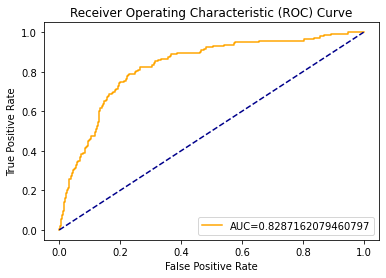

In [143]:
#evaluation(ROC Curve)
y_score1 = log.predict_proba(x_test_scaled)[:,1]
LOG_roc_auc_score = roc_auc_score(y_test,y_score1)
print('roc_auc_score for Logistic Regression:', roc_auc_score(y_test,y_score1))

#ROC Curve Plot
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score1)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score1)
plot_roc_curve(fpr, tpr)

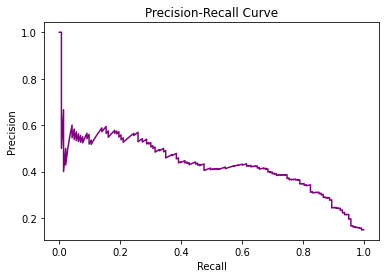

In [144]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score1 = log.predict_proba(x_test_scaled)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score1)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

### Decision Tree Classsifier

In [184]:
dt= DecisionTreeClassifier(random_state=42)

#learning
dt.fit(x_train_sm,y_train_sm)

#Prediction
prediction1=dt.predict(x_train_sm)
prediction2=dt.predict(x_test_scaled)


DT_Accuracy_train = accuracy_score(prediction1,y_train_sm)
DT_Accuracy_test = accuracy_score(prediction2,y_test)
pre_dt=precision_score(y_test, prediction2)
recall_dt=recall_score(y_test, prediction2)

#evaluation(Accuracy)
print("DT_Accuracy_train:",accuracy_score(prediction1,y_train_sm))
print("DT_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2))

#Error Rate
print('Error Rate of Testing:', 1-DT_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train_sm, prediction1))  
print(classification_report(y_test, prediction2)) 

DT_Accuracy_train: 1.0
DT_Accuracy_test: 0.894
Confusion Metrix test:
 [[786  35]
 [ 71 108]]
Precision score of Testing:  0.6033519553072626
Recall/Sensitivity score of Testing:  0.7552447552447552
F1 Score score of Testing:  0.6708074534161491
Specificity Score score of Testing:  0.7552447552447552
Error Rate of Testing: 0.10599999999999998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       857
           1       0.60      0.76      0.67       143

    accuracy                           0.89      1000
   macro avg       0.78      0.84      0.80      1000
weighted avg       0.91      0.89      0.90      1000



roc_auc_score for Decision Tree: 0.8361988070272784


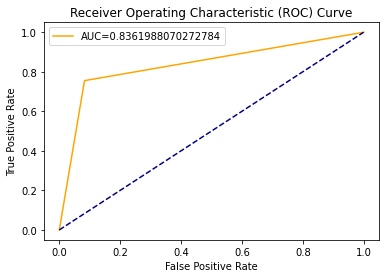

In [147]:
#evaluation(ROC Curve)
y_score2 = dt.predict_proba(x_test_scaled)[:,1]
DT_roc_auc_score = roc_auc_score(y_test,y_score2)
print('roc_auc_score for Decision Tree:', roc_auc_score(y_test,y_score2))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score2)
plot_roc_curve(fpr, tpr)

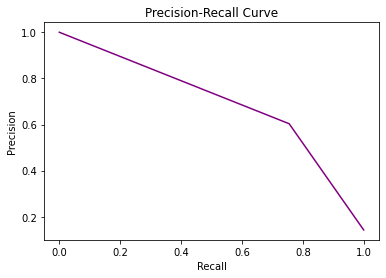

In [148]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score2 = dt.predict_proba(x_test_scaled)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score2)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

### RANDOM FOREST CLASSIFIER

In [185]:
#importing module
from sklearn.ensemble import RandomForestClassifier

#making the instance
rf= RandomForestClassifier(random_state=42)

#learning
rf.fit(x_train_sm,y_train_sm)

#Prediction
prediction1=rf.predict(x_train_sm)
prediction2=rf.predict(x_test_scaled)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

RF_Accuracy_train = accuracy_score(prediction1,y_train_sm)
RF_Accuracy_test = accuracy_score(prediction2,y_test)
pre_rf=precision_score(y_test, prediction2)
recall_rf=recall_score(y_test, prediction2)

#evaluation(Accuracy)
print("RF_Accuracy_train:",accuracy_score(prediction1,y_train_sm))
print("RF_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2))

#Error Rate
print('Error Rate of Testing:', 1-RF_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train_sm, prediction1))  
print(classification_report(y_test, prediction2)) 

RF_Accuracy_train: 1.0
RF_Accuracy_test: 0.946
Confusion Metrix test:
 [[837  34]
 [ 20 109]]
Precision score of Testing:  0.8449612403100775
Recall/Sensitivity score of Testing:  0.7622377622377622
F1 Score score of Testing:  0.801470588235294
Specificity Score score of Testing:  0.7622377622377622
Error Rate of Testing: 0.05400000000000005
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       857
           1       0.84      0.76      0.80       143

    accuracy                           0.95      1000
   macro avg       0.90      0.87      0.89      1000
weighted avg       0.94      0.95      0.94      1000



roc_auc_score for Random Forest: 0.9306452007735555


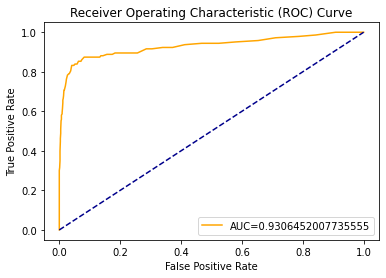

In [150]:
#evaluation(ROC Curve)
y_score3 = rf.predict_proba(x_test_scaled)[:,1]
RF_roc_auc_score = roc_auc_score(y_test,y_score3)
print('roc_auc_score for Random Forest:', roc_auc_score(y_test,y_score3))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score3)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score3)
plot_roc_curve(fpr, tpr)

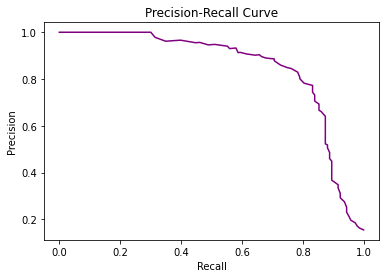

In [151]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score3 = rf.predict_proba(x_test_scaled)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score3)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

### support vector classifier

In [186]:
#importing module
from sklearn.svm import SVC

#making the instance
svc= SVC(random_state=42)

#learning
svc.fit(x_train_sm,y_train_sm)

#Prediction
prediction1=svc.predict(x_train_sm)
prediction2=svc.predict(x_test_scaled)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

SVC_Accuracy_train = accuracy_score(prediction1,y_train_sm)
SVC_Accuracy_test = accuracy_score(prediction2,y_test)
pre_svc=precision_score(y_test, prediction2)
recall_svc=recall_score(y_test, prediction2)

#evaluation(Accuracy)
print("SVC_Accuracy_train:",accuracy_score(prediction1,y_train_sm))
print("SVC_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2))

#Error Rate
print('Error Rate of Testing:', 1-SVC_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train_sm, prediction1))  
print(classification_report(y_test, prediction2)) 

SVC_Accuracy_train: 0.927997992975414
SVC_Accuracy_test: 0.903
Confusion Metrix test:
 [[801  41]
 [ 56 102]]
Precision score of Testing:  0.6455696202531646
Recall/Sensitivity score of Testing:  0.7132867132867133
F1 Score score of Testing:  0.6777408637873755
Specificity Score score of Testing:  0.7132867132867133
Error Rate of Testing: 0.09699999999999998
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1993
           1       0.95      0.91      0.93      1993

    accuracy                           0.93      3986
   macro avg       0.93      0.93      0.93      3986
weighted avg       0.93      0.93      0.93      3986

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       857
           1       0.65      0.71      0.68       143

    accuracy                           0.90      1000
   macro avg       0.80      0.82      0.81      1000
weighted avg       0.91      0.90      0

roc_auc_score for Support Vector Machine: 0.5


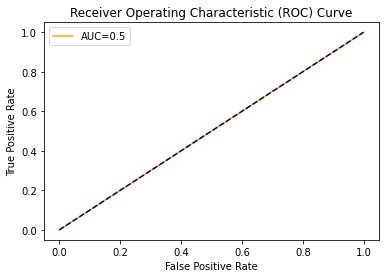

In [153]:
#evaluation(ROC Curve)
from sklearn.pipeline import make_pipeline
clf = make_pipeline(SVC(gamma='auto',probability=True))
clf.fit(x_train,y_train)
y_score4 = clf.predict_proba(x_test_scaled)[:,1]
SVC_roc_auc_score = roc_auc_score(y_test,y_score4)
print('roc_auc_score for Support Vector Machine:', roc_auc_score(y_test,y_score4))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score4)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score4)
plot_roc_curve(fpr, tpr)

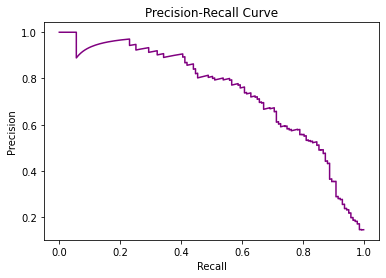

In [154]:
#PR Curve
from sklearn.metrics import precision_recall_curve
clf = make_pipeline(SVC(gamma='auto',probability=True))
clf.fit(x_train_sm,y_train_sm)
y_score4 = clf.predict_proba(x_test_scaled)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score4)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

### K Nearest Neighbours

In [187]:
#importing module
from sklearn.neighbors import KNeighborsClassifier

#making the instance
knn = KNeighborsClassifier(n_jobs=-1)

#learning
knn.fit(x_train_sm,y_train_sm)

#Prediction
prediction1=knn.predict(x_train_sm)
prediction2=knn.predict(x_test_scaled)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve
recall_knn=recall_score(y_test, prediction2)

KNN_Accuracy_train = accuracy_score(prediction1,y_train_sm)
KNN_Accuracy_test = accuracy_score(prediction2,y_test)
pre_knn=precision_score(y_test, prediction2)

#evaluation(Accuracy)
print("KNN_Accuracy_train:",accuracy_score(prediction1,y_train_sm))
print("KNN_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-KNN_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train_sm, prediction1))  
print(classification_report(y_test, prediction2)) 

KNN_Accuracy_train: 0.9272453587556447
KNN_Accuracy_test: 0.778
Confusion Metrix test:
 [[671  36]
 [186 107]]
Precision score of Testing:  0.3651877133105802
Recall/Sensitivity score of Testing:  0.7482517482517482
F1 Score score of Testing:  0.4908256880733945
Specificity Score score of Testing:  0.7829638273045507
Error Rate of Testing: 0.22199999999999998
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1993
           1       0.88      1.00      0.93      1993

    accuracy                           0.93      3986
   macro avg       0.94      0.93      0.93      3986
weighted avg       0.94      0.93      0.93      3986

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       857
           1       0.37      0.75      0.49       143

    accuracy                           0.78      1000
   macro avg       0.66      0.77      0.67      1000
weighted avg       0.87      0.78      

roc_auc_score for K Nearest Neighbors: 0.836929115225498


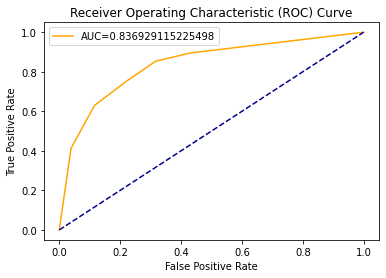

In [156]:
#evaluation(ROC Curve)
y_score5 = knn.predict_proba(x_test_scaled)[:,1]
KNN_roc_auc_score = roc_auc_score(y_test,y_score5)
print('roc_auc_score for K Nearest Neighbors:', roc_auc_score(y_test,y_score5))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score5)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score5)
plot_roc_curve(fpr, tpr)

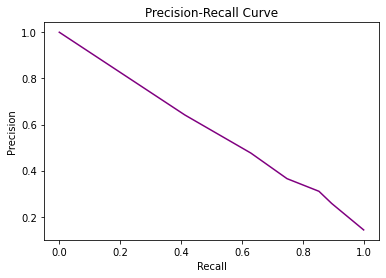

In [157]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score5 = knn.predict_proba(x_test_scaled)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score5)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

### XG Boost

In [188]:
#importing module
from xgboost import XGBClassifier

#making the instance
xgb= XGBClassifier(random_state=42)

#learning
xgb.fit(x_train_sm,y_train_sm)

#Prediction
prediction1=xgb.predict(x_train_sm)
prediction2=xgb.predict(x_test_scaled)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

XGB_Accuracy_train = accuracy_score(prediction1,y_train_sm)
XGB_Accuracy_test = accuracy_score(prediction2,y_test)
pre_xg=precision_score(y_test, prediction2)
recall_xg=recall_score(y_test, prediction2)

#evaluation(Accuracy)
print("XGB_Accuracy_train:",accuracy_score(prediction1,y_train_sm))
print("XGB_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))
#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-XGB_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train_sm, prediction1))  
print(classification_report(y_test, prediction2)) 

XGB_Accuracy_train: 1.0
XGB_Accuracy_test: 0.949
Confusion Metrix test:
 [[840  34]
 [ 17 109]]
Precision score of Testing:  0.8650793650793651
Recall/Sensitivity score of Testing:  0.7622377622377622
F1 Score score of Testing:  0.8104089219330856
Specificity Score score of Testing:  0.9801633605600933
Error Rate of Testing: 0.051000000000000045
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       857
           1       0.87      0.76      0.81       143

    accuracy                           0.95      1000
   macro avg       0.91      0.87      0.89      1000
weighted avg       0.95      0.95      0.95      1000

roc_auc_score for XG Boosting: 0.9253127269463325


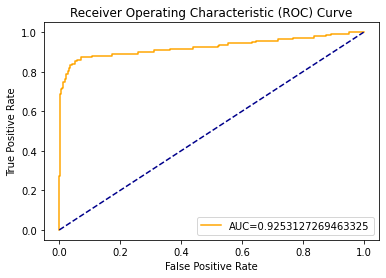

In [159]:
#evaluation(ROC Curve)
y_score6 = xgb.predict_proba(x_test_scaled)[:,1]
XGB_roc_auc_score = roc_auc_score(y_test,y_score6)
print('roc_auc_score for XG Boosting:', roc_auc_score(y_test,y_score6))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score6)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score6)
plot_roc_curve(fpr, tpr)

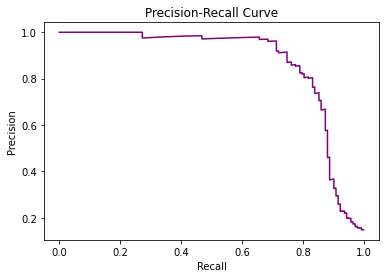

In [160]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score6 = xgb.predict_proba(x_test_scaled)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score6)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

### gradient boosing classifier

In [189]:
#importing module
from sklearn.ensemble import GradientBoostingClassifier

#making the instance
gb= GradientBoostingClassifier(random_state=42)

#learning
gb.fit(x_train_sm,y_train_sm)

#Prediction
prediction1=gb.predict(x_train_sm)
prediction2=gb.predict(x_test_scaled)

#importing the metrics module
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
classification_report, roc_auc_score, roc_curve

GB_Accuracy_train = accuracy_score(prediction1,y_train_sm)
GB_Accuracy_test = accuracy_score(prediction2,y_test)
pre_gradient=precision_score(y_test, prediction2)
print(pre_gradient)
recall_gradient=recall_score(y_test, prediction2)
#evaluation(Accuracy)
print("GB_Accuracy_train:",accuracy_score(prediction1,y_train_sm))
print("GB_Accuracy_test:",accuracy_score(prediction2,y_test))

#evaluation(Confusion Metrix)
print("Confusion Metrix test:\n",confusion_matrix(prediction2,y_test))

#evaluation(precission score,recall,f1 score)
print('Precision score of Testing: ', precision_score(y_test, prediction2))
print('Recall/Sensitivity score of Testing: ', recall_score(y_test, prediction2))
print('F1 Score score of Testing: ', f1_score(y_test, prediction2))
print('Specificity Score score of Testing: ', recall_score(y_test, prediction2, pos_label = 0))

#Error Rate
print('Error Rate of Testing:', 1-GB_Accuracy_test)

#evaluation(classification report)
print(classification_report(y_train_sm, prediction1))  
print(classification_report(y_test, prediction2)) 

0.8345864661654135
GB_Accuracy_train: 0.9623682890115404
GB_Accuracy_test: 0.946
Confusion Metrix test:
 [[835  32]
 [ 22 111]]
Precision score of Testing:  0.8345864661654135
Recall/Sensitivity score of Testing:  0.7762237762237763
F1 Score score of Testing:  0.8043478260869565
Specificity Score score of Testing:  0.9743290548424738
Error Rate of Testing: 0.05400000000000005
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1993
           1       0.98      0.95      0.96      1993

    accuracy                           0.96      3986
   macro avg       0.96      0.96      0.96      3986
weighted avg       0.96      0.96      0.96      3986

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       857
           1       0.83      0.78      0.80       143

    accuracy                           0.95      1000
   macro avg       0.90      0.88      0.89      1000
weighted avg       0.9

roc_auc_score for Gradient Boosting: 0.925010811825281


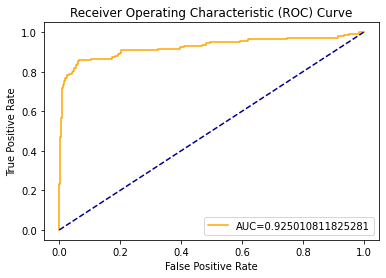

In [162]:
#evaluation(ROC Curve)
y_score7 = gb.predict_proba(x_test_scaled)[:,1]
GB_roc_auc_score = roc_auc_score(y_test,y_score7)
print('roc_auc_score for Gradient Boosting:', roc_auc_score(y_test,y_score7))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC='+str(roc_auc_score(y_test,y_score7)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve') 
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, y_score7)
plot_roc_curve(fpr, tpr)

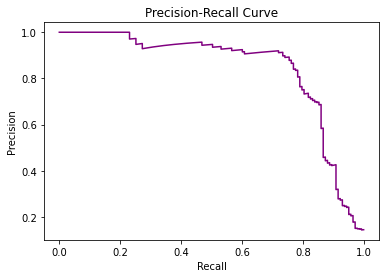

In [163]:
#PR Curve
from sklearn.metrics import precision_recall_curve
y_score = gb.predict_proba(x_test_scaled)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_score7)
fig, ax = plt.subplots()
ax.plot(recall, precision, color = 'purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.show()

## MODEL COMPARISION REPORT

In [191]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier', 'KNN', 'XGB', 'GB'],  
                       'AUC Score':[LOG_roc_auc_score, DT_roc_auc_score, RF_roc_auc_score, SVC_roc_auc_score, KNN_roc_auc_score, XGB_roc_auc_score, GB_roc_auc_score],
                      'Precision score ':[pre_lr,pre_dt,pre_rf,pre_svc,pre_knn,pre_xg,pre_gradient],
                      'Recall Score':[recall_lr,recall_dt,recall_rf,recall_svc,recall_knn,recall_xg,recall_gradient]})
models

,Model,AUC Score,Precision score,Recall Score
0,Logistic Regression,0.828716,0.357595,0.790210
1,Decision Tree,0.836199,0.603352,0.755245
2,Random Forest,0.930645,0.844961,0.762238
3,Support Vector Classifier,0.500000,0.645570,0.713287
4,KNN,0.836929,0.365188,0.748252
5,XGB,0.925313,0.865079,0.762238
6,GB,0.925011,0.834586,0.776224


In [165]:
list(data.columns)

['account_length',
 'intl_plan',
 'vmail_plan',
 'vmail_message',
 'day_calls',
 'day_charge',
 'eve_calls',
 'eve_charge',
 'night_calls',
 'night_charge',
 'intl_calls',
 'intl_charge',
 'custServ_calls',
 'churn']

-  Since the Telecom Customer Churn Analysis dataset is typically imbalanced, with fewer churned customers compared to non-churned customers, accuracy alone may not be a sufficient evaluation metric. In such cases, metrics like precision, recall, and F1-score may be more appropriate as they take into account the class imbalance.



-  For example, a business may use a predictive model based on the Telecom Customer Churn Analysis dataset to identify customers who are at risk of churning and offer them targeted retention incentives. In this case, the precision score of the model will be an important factor in determining its effectiveness, as it measures the accuracy of the model in identifying customers who are truly at risk of churning and therefore likely to respond to retention incentives.





-  Precision and recall can provide insight into different aspects of model performance. Precision measures the proportion of true positives among all positive predictions, which can be useful in identifying customers who are most likely to churn and thus may require targeted retention efforts. Recall measures the proportion of true positives among all actual positive cases, which can be useful in identifying as many at-risk customers as possible, even if some false positives are included.



-  For example, if a classifier has an AUC score of 92 in telecom churn analysis, it means that the model has a high ability to distinguish between customers who are at risk of churning and those who are not. This means that the model is likely to be useful in identifying customers who are at risk of churning and targeting retention efforts towards them.



#### Random Forest fits best for our dataset out of our tested models

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#making the instance
model=RandomForestClassifier()

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#learning
model1.fit(x_train_sm,y_train_sm)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(x_test_scaled)

#importing the metrics module
from sklearn import metrics

pre_rf1=precision_score(y_test, prediction2)
print('precision: ',pre_rf1)
recall_rf1=recall_score(y_test, prediction2)
print('recall: ',recall_rf1)
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
precision:  0.8345864661654135
recall:  0.7762237762237763
Confusion Metrix:
 [[836  33]
 [ 21 110]]
